In [4]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, confusion_matrix

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [4]:
# Load the dataset
data = pd.read_csv('/content/Titanic_train.csv')

In [6]:
# Display the first few rows of the dataset
data.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [8]:
# Summary statistics of the dataset
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [13]:
# Checking the data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
# Correlation matrix
data.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


# Visualizations

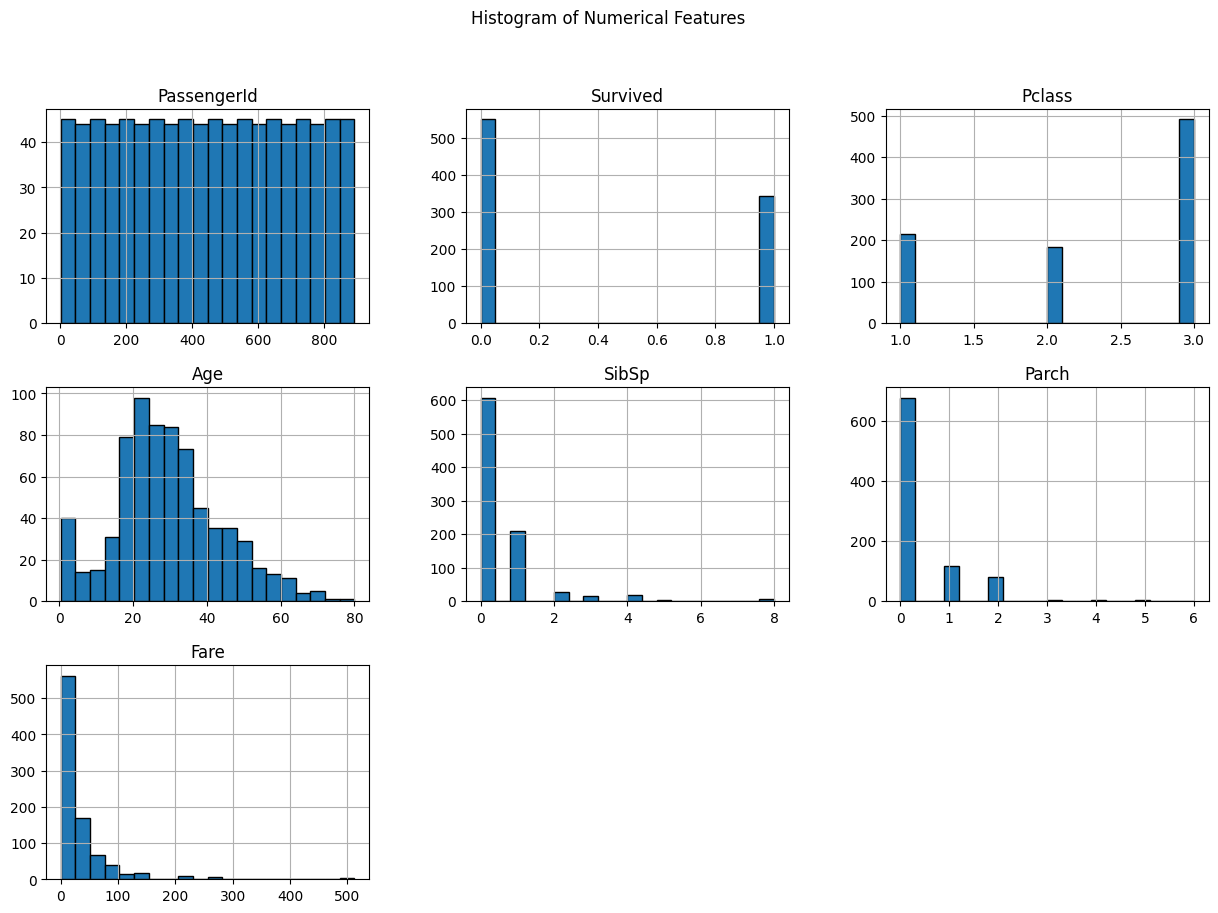

In [19]:
# Histogram of numerical features
data.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histogram of Numerical Features')
plt.show()

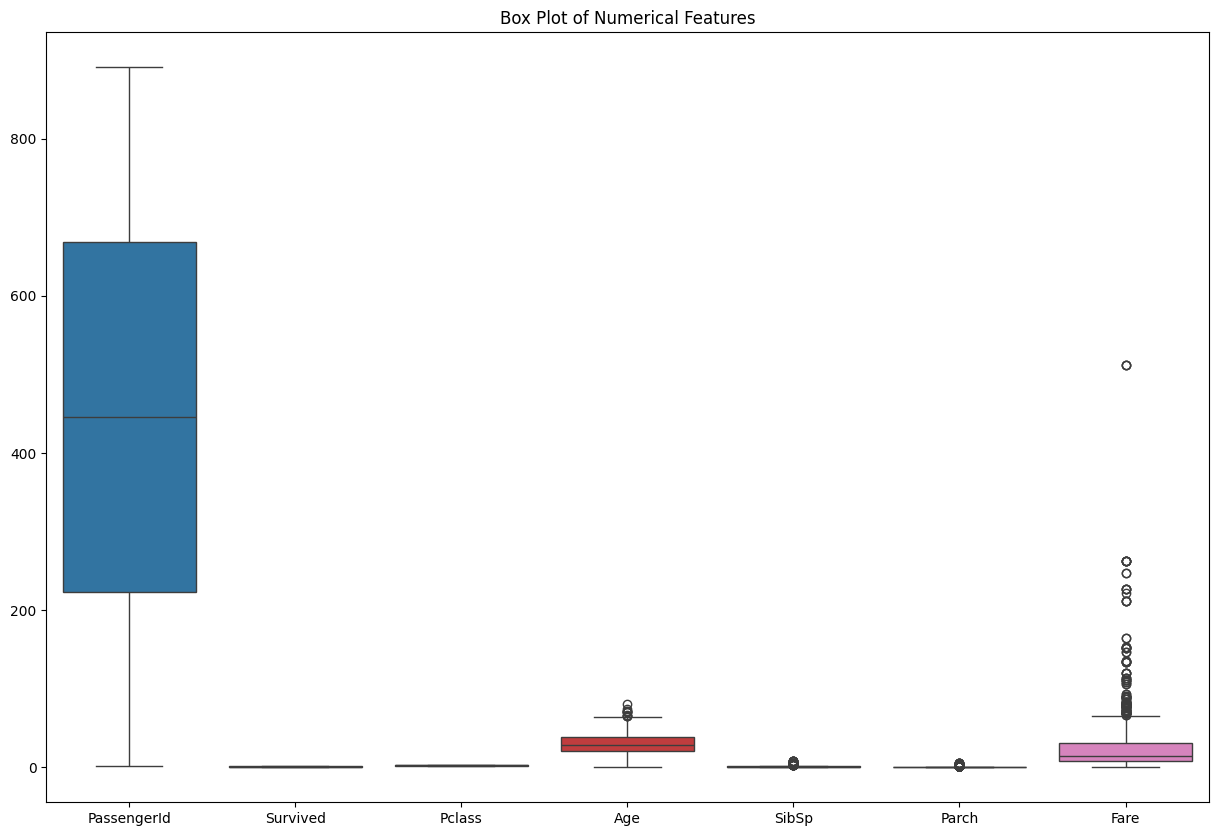

In [20]:
# Box plots to visualize distributions and detect outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=data.select_dtypes(include=['float64', 'int64']))
plt.title('Box Plot of Numerical Features')
plt.show()

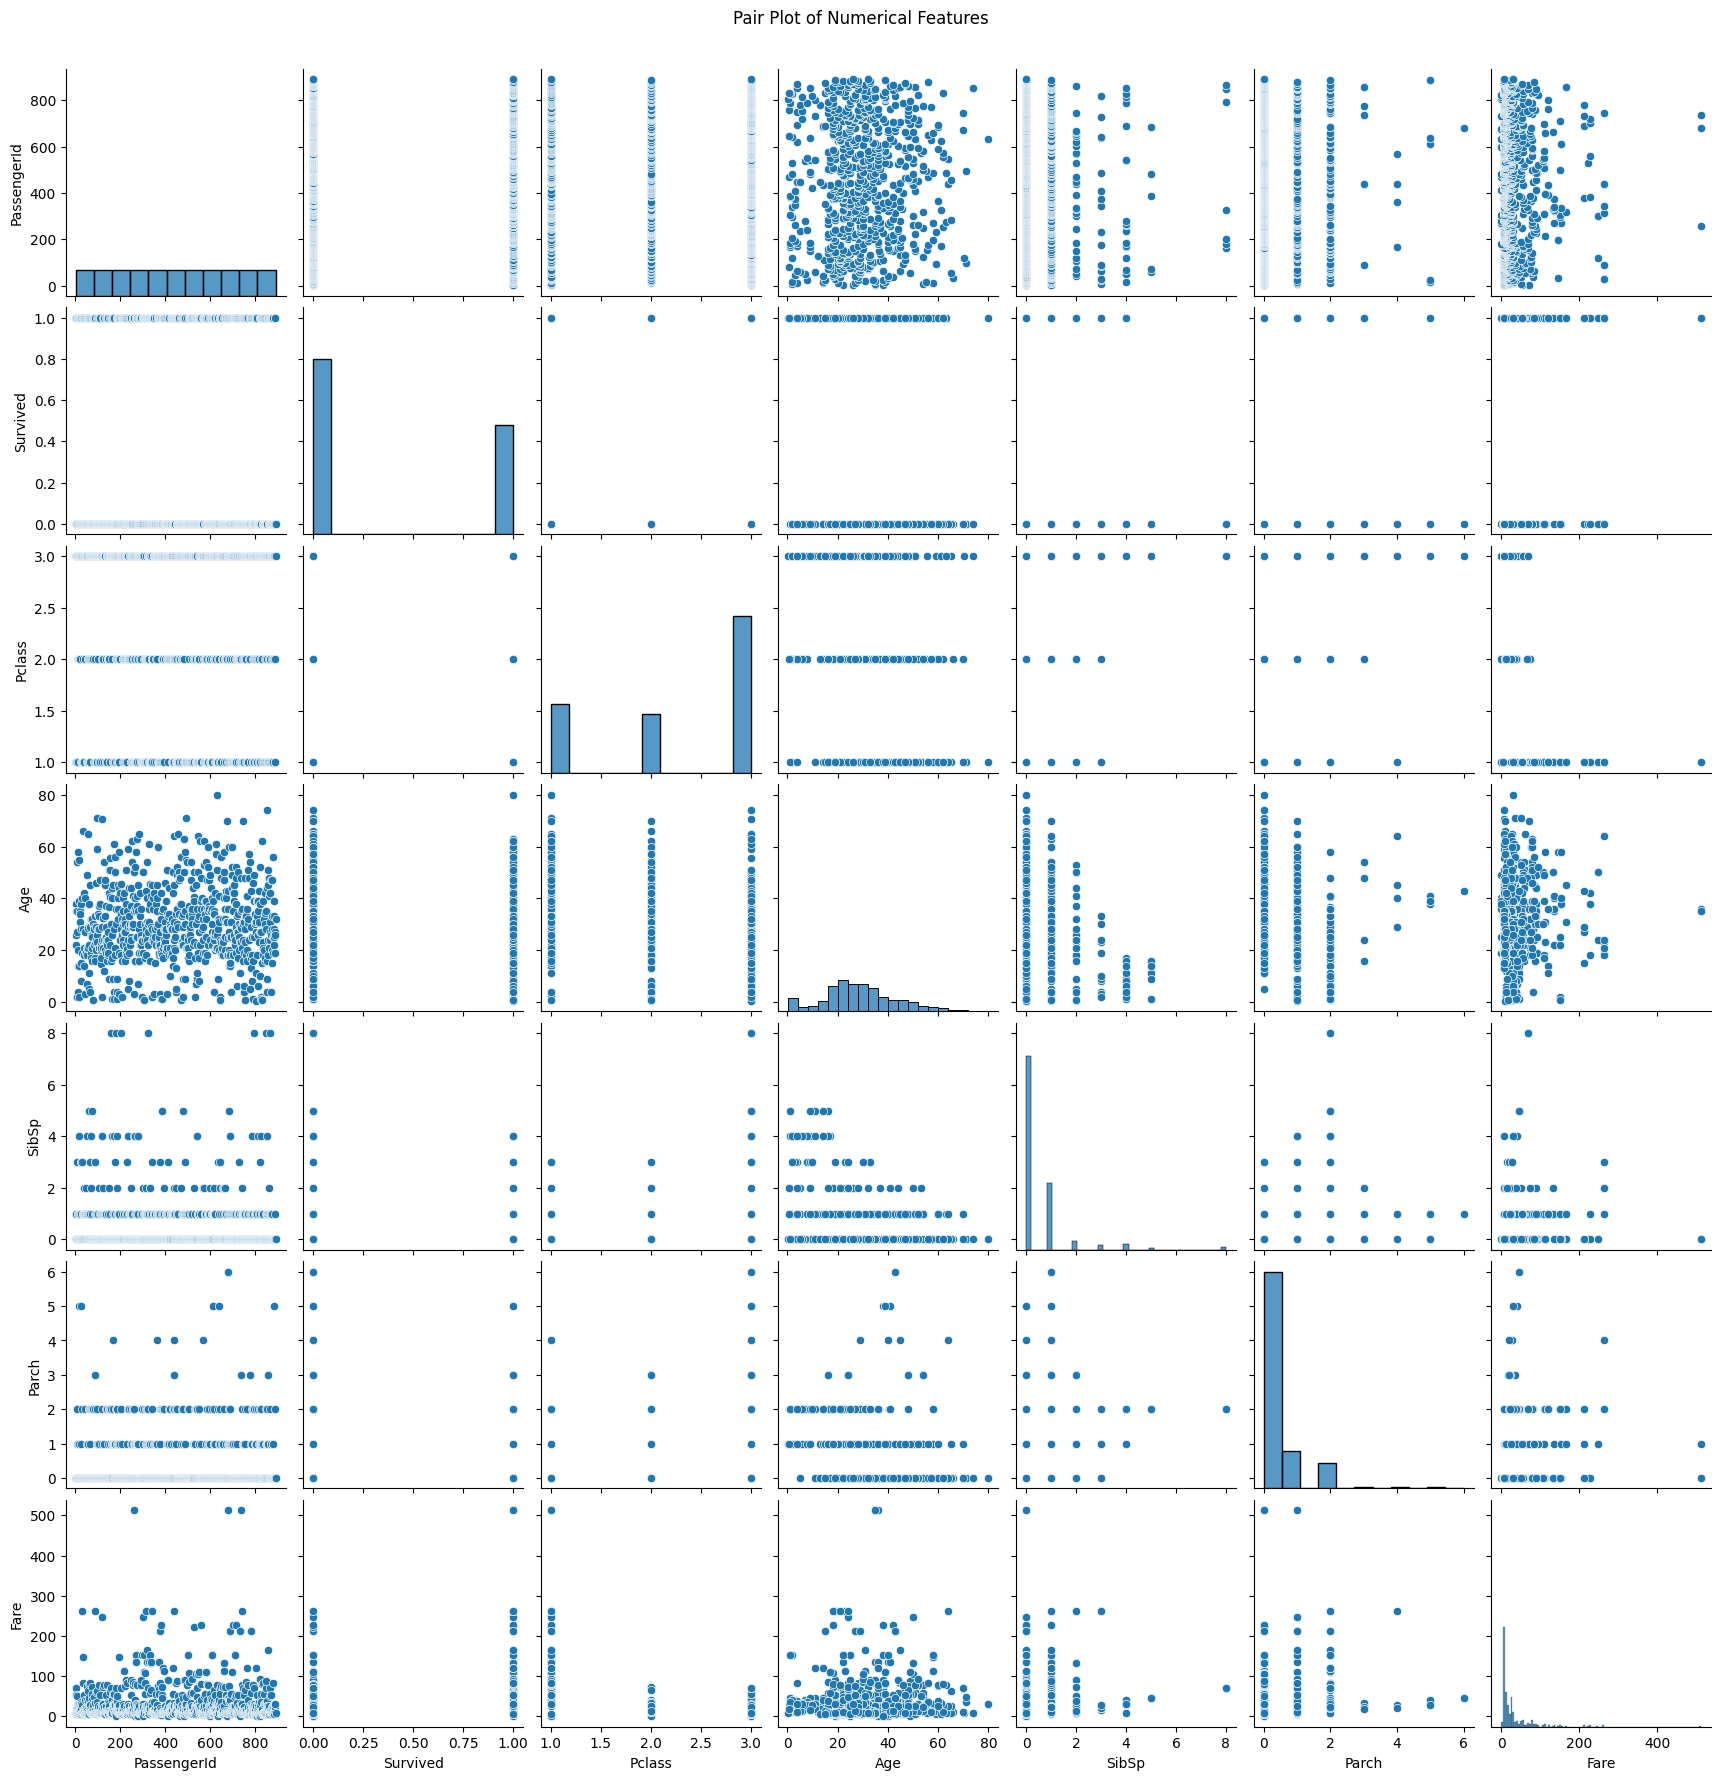

In [21]:
# Pair plots to visualize relationships between features
sns.pairplot(data.select_dtypes(include=['float64', 'int64']))
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

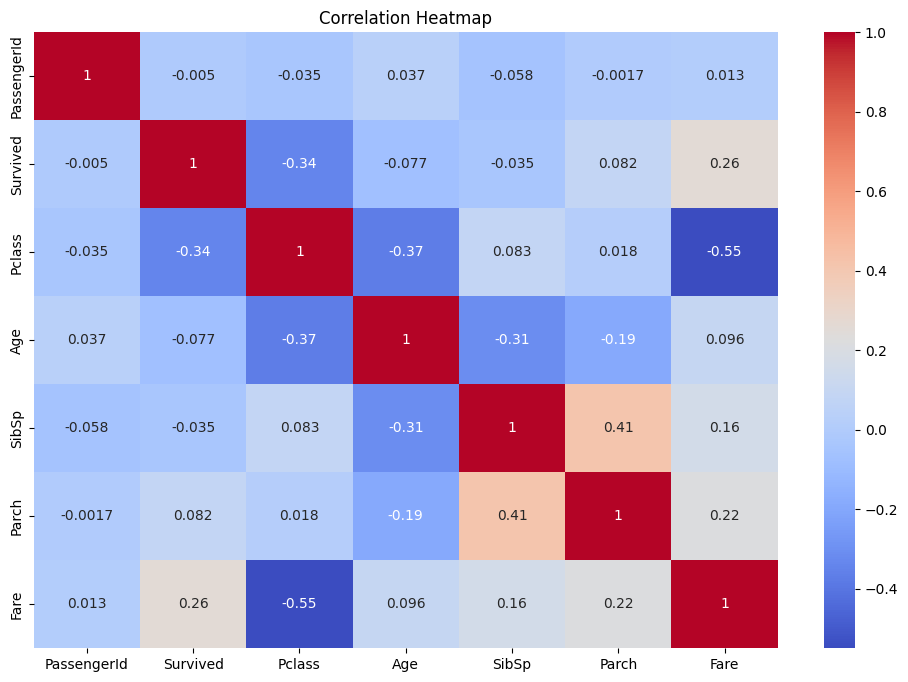

In [23]:
# Heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Handling missing values

In [33]:
# Impute numerical columns with the median
# here iam selecting only numerical columns
numerical_features = data.select_dtypes(include=['float', 'int']).columns
imputer_num = SimpleImputer(strategy='median')
data[numerical_features] = imputer_num.fit_transform(data[numerical_features])

In [38]:
# Encoding categorical variables using LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_features:
    data[col] = label_encoder.fit_transform(data[col])

# Display the first few rows of the processed dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,108.0,1.0,22.0,1.0,0.0,523.0,7.2500,47.0,2.0
1,2.0,1.0,1.0,190.0,0.0,38.0,1.0,0.0,596.0,71.2833,81.0,0.0
2,3.0,1.0,3.0,353.0,0.0,26.0,0.0,0.0,669.0,7.9250,47.0,2.0
3,4.0,1.0,1.0,272.0,0.0,35.0,1.0,0.0,49.0,53.1000,55.0,2.0
4,5.0,0.0,3.0,15.0,1.0,35.0,0.0,0.0,472.0,8.0500,47.0,2.0


In [42]:
data.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0



#Model Building



In [69]:
# Define features (X) and target (y) - assuming 'Survived' is the target column
X = data.drop(columns=['Survived'])  # Drop the target column
y = data['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the logistic regression model
model = LogisticRegression(max_iter=200)  # Increase iterations if needed
model.fit(X_train, y_train)

# Predict using the test set
y_pred = model.predict(X_test)

# Predict using the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.466367
         Iterations 6


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Evaluate the model

In [63]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

In [62]:
# Printing all the evaluation metrics
print('Accuracy:', round(accuracy, 2))
print('Precision:', round(precision, 2))
print('Recall:', round(recall, 2))
print('F1 Score:', round(f1, 2))
print('ROC-AUC Score:', round(roc_auc, 2))


Accuracy: 0.77
Precision: 0.74
Recall: 0.69
F1 Score: 0.71
ROC-AUC Score: 0.83


In [60]:
# Confusion Matrix and Classification Report
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[87 18]
 [23 51]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.83      0.81       105
         1.0       0.74      0.69      0.71        74

    accuracy                           0.77       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



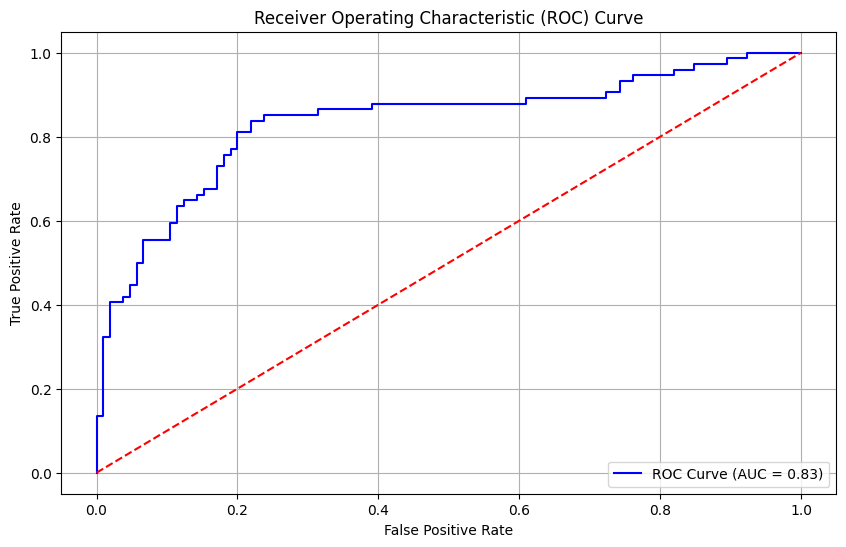

In [61]:
# Visualize the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [70]:
# Interpretation of Coefficients
coefficients = result.params
print("\nCoefficients Interpretation:")

for feature, coef in coefficients.items():
    print(f"The coefficient for {feature} is {coef:.4f}. This implies that for a one-unit increase in {feature}, "
          f"the log-odds of survival changes by {coef:.4f} units.")




Coefficients Interpretation:
The coefficient for PassengerId is 0.0010. This implies that for a one-unit increase in PassengerId, the log-odds of survival changes by 0.0010 units.
The coefficient for Pclass is -0.1256. This implies that for a one-unit increase in Pclass, the log-odds of survival changes by -0.1256 units.
The coefficient for Name is -0.0001. This implies that for a one-unit increase in Name, the log-odds of survival changes by -0.0001 units.
The coefficient for Sex is -2.5455. This implies that for a one-unit increase in Sex, the log-odds of survival changes by -2.5455 units.
The coefficient for Age is -0.0055. This implies that for a one-unit increase in Age, the log-odds of survival changes by -0.0055 units.
The coefficient for SibSp is -0.2675. This implies that for a one-unit increase in SibSp, the log-odds of survival changes by -0.2675 units.
The coefficient for Parch is -0.1634. This implies that for a one-unit increase in Parch, the log-odds of survival changes

In [71]:
# Discussing Significance of Features
significant_features = result.pvalues[result.pvalues < 0.05].index
print("\nSignificant Features:")
for feature in significant_features:
    print(f"The feature '{feature}' is statistically significant in predicting survival "
          f"(p-value = {result.pvalues[feature]:.4f}).")


Significant Features:
The feature 'PassengerId' is statistically significant in predicting survival (p-value = 0.0054).
The feature 'Sex' is statistically significant in predicting survival (p-value = 0.0000).
The feature 'SibSp' is statistically significant in predicting survival (p-value = 0.0117).
The feature 'Fare' is statistically significant in predicting survival (p-value = 0.0003).
The feature 'Cabin' is statistically significant in predicting survival (p-value = 0.0000).


In [ ]:
%pip install streamlit

  Using cached streamlit-1.41.1-py2.py3-none-any.whl.metadata (8.5 kB)
  Using cached altair-5.5.0-py3-none-any.whl.metadata (11 kB)
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached cachetools-5.5.0-py3-none-any.whl.metadata (5.3 kB)
  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
  Using cached pillow-11.1.0-cp39-cp39-win_amd64.whl.metadata (9.3 kB)
  Using cached protobuf-5.29.3-cp39-cp39-win_amd64.whl.metadata (592 bytes)
  Using cached pyarrow-19.0.0-cp39-cp39-win_amd64.whl.metadata (3.4 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached rich-13.9.4-py3-none-any.whl.metadata (18 kB)
  Using cached tenacity-9.0.0-py3-none-any.whl.metadata (1.2 kB)
  Using cached toml-0.10.2-py2.py3-none-any.whl.metadata (7.1 kB)
  Using cached watchdog-6.0.0-py3-none-win_amd64.whl.metadata (44 kB)
  Using cached GitPython-3.1.44-py3-none-any.whl.metadata (13 kB)
  Using cached pydeck-0.9.1-py2.py3-none-any.whl.metadata (4.

In [5]:
import streamlit as st

In [6]:
st.title("Hello, Streamlit!")
st.write("This is your first Streamlit app.")

2025-01-20 20:59:02.400 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-20 20:59:02.878 
  command:

    streamlit run c:\Users\Telang\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-01-20 20:59:02.878 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-20 20:59:02.878 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-20 20:59:02.878 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-20 20:59:02.887 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-20 20:59:02.887 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
